In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
data = pd.read_csv('/content/Dynamic_2017_2_0.csv')

In [ ]:
data["Name of State"].head(50)

0        ANDHRA PRADESH
1        ANDHRA PRADESH
2        ANDHRA PRADESH
3        ANDHRA PRADESH
4        ANDHRA PRADESH
5        ANDHRA PRADESH
6        ANDHRA PRADESH
7        ANDHRA PRADESH
8        ANDHRA PRADESH
9        ANDHRA PRADESH
10       ANDHRA PRADESH
11       ANDHRA PRADESH
12       ANDHRA PRADESH
13    ARUNACHAL PRADESH
14    ARUNACHAL PRADESH
15    ARUNACHAL PRADESH
16    ARUNACHAL PRADESH
17    ARUNACHAL PRADESH
18    ARUNACHAL PRADESH
19    ARUNACHAL PRADESH
20    ARUNACHAL PRADESH
21    ARUNACHAL PRADESH
22    ARUNACHAL PRADESH
23    ARUNACHAL PRADESH
24    ARUNACHAL PRADESH
25    ARUNACHAL PRADESH
26    ARUNACHAL PRADESH
27    ARUNACHAL PRADESH
28    ARUNACHAL PRADESH
29                ASSAM
30                ASSAM
31                ASSAM
32                ASSAM
33                ASSAM
34                ASSAM
35                ASSAM
36                ASSAM
37                ASSAM
38                ASSAM
39                ASSAM
40                ASSAM
41              

In [ ]:
data.dropna(inplace=True)

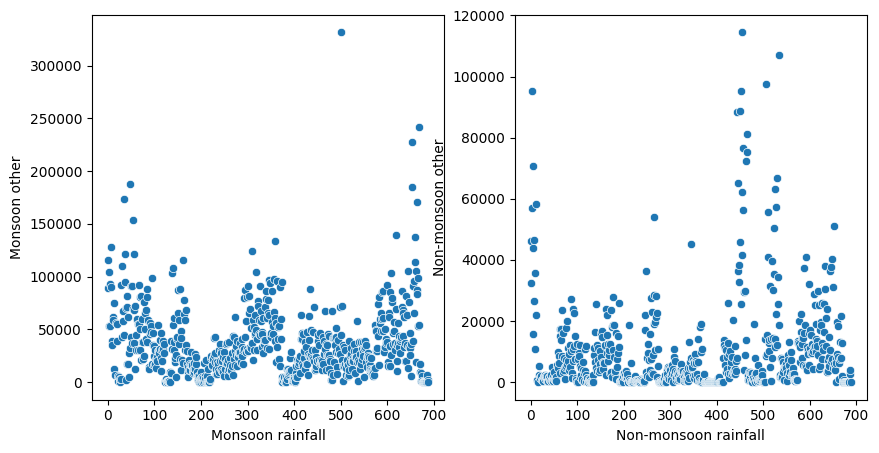

In [ ]:

# Calculate summary statistics


fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Scatter plot for Monsoon Season
sns.scatterplot(data['Recharge from rainfall During Monsoon Season'], ax=ax[0])
ax[0].set_xlabel('Monsoon rainfall')
ax[0].set_ylabel('Monsoon other')

# Scatter plot for Non-monsoon Season
sns.scatterplot(data['Recharge from other sources During Monsoon Season'], ax=ax[1])
ax[1].set_xlabel('Non-monsoon rainfall')
ax[1].set_ylabel('Non-monsoon other')

plt.show()


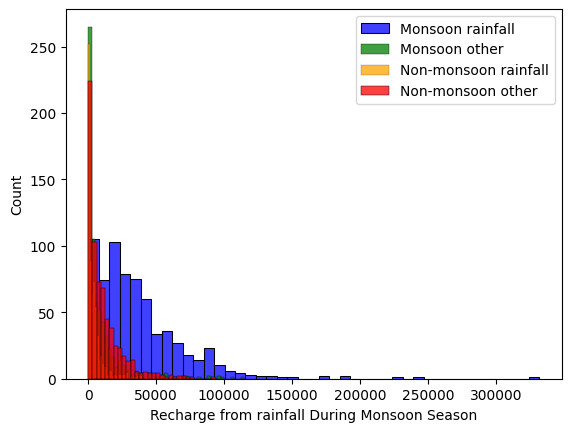

In [ ]:
# Distribution of recharge
sns.histplot(data['Recharge from rainfall During Monsoon Season'], kde=False, color='blue')
sns.histplot(data['Recharge from other sources During Monsoon Season'], kde=False, color='green')
sns.histplot(data['Recharge from rainfall During Non Monsoon Season'], kde=False, color='orange')
sns.histplot(data['Recharge from other sources During Non Monsoon Season'], kde=False, color='red')
plt.legend(['Monsoon rainfall', 'Monsoon other', 'Non-monsoon rainfall', 'Non-monsoon other'])
plt.show()

<ipython-input-34-8000aee23577>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x='Name of State', y='Recharge from rainfall During Monsoon Season', data=data.groupby('Name of State').sum().reset_index())


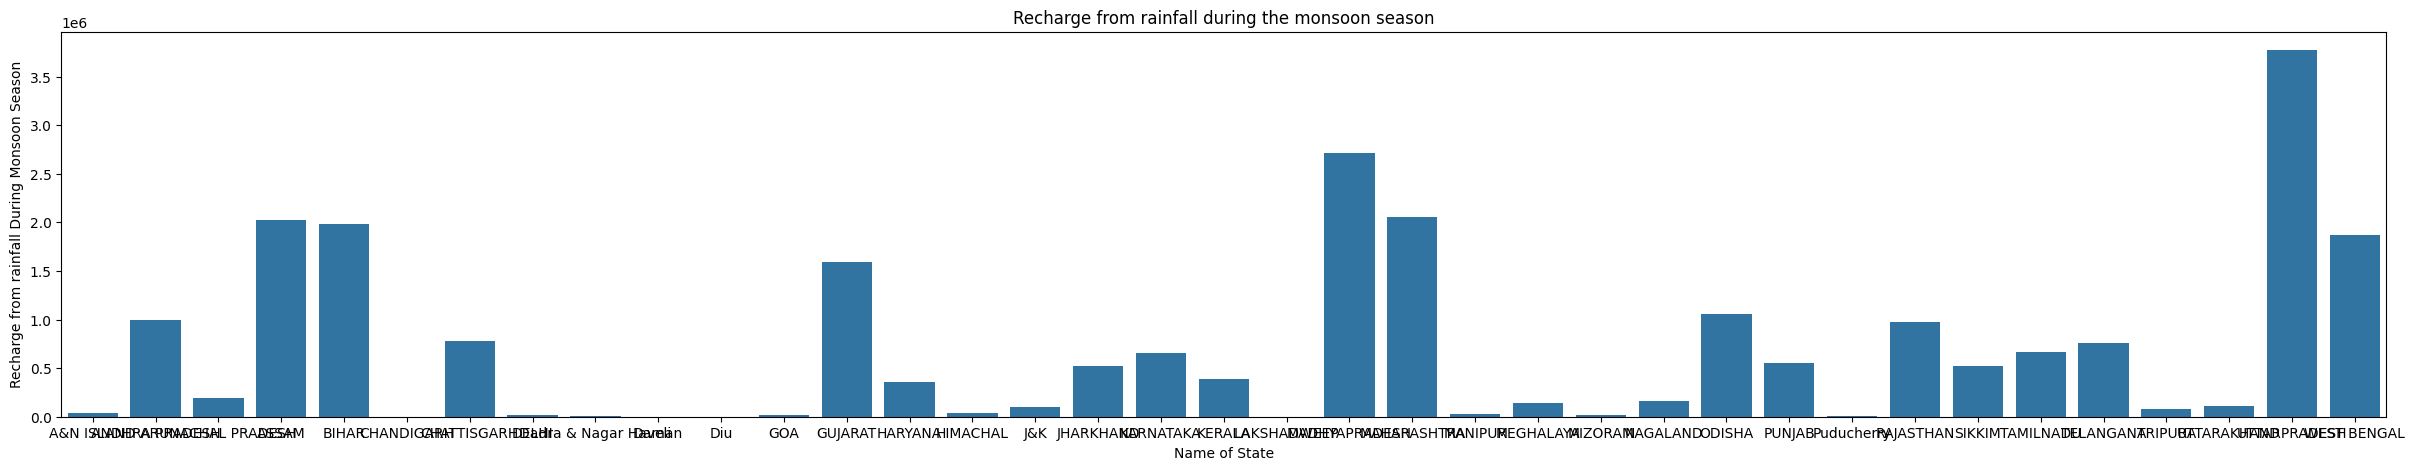

<ipython-input-34-8000aee23577>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x='Name of State', y='Recharge from other sources During Monsoon Season', data=data.groupby('Name of State').sum().reset_index())


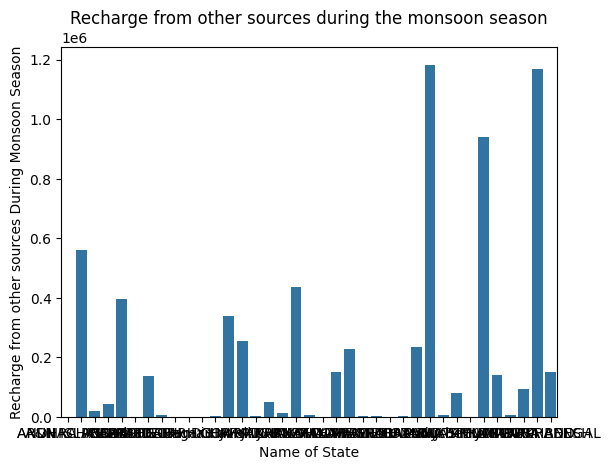

<ipython-input-34-8000aee23577>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x='Name of State', y='Recharge from rainfall During Non Monsoon Season', data=data.groupby('Name of State').sum().reset_index())


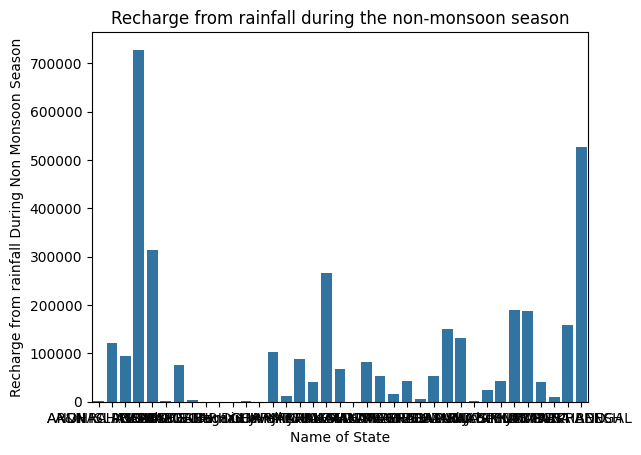

<ipython-input-34-8000aee23577>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x='Name of State', y='Recharge from other sources During Non Monsoon Season', data=data.groupby('Name of State').sum().reset_index())


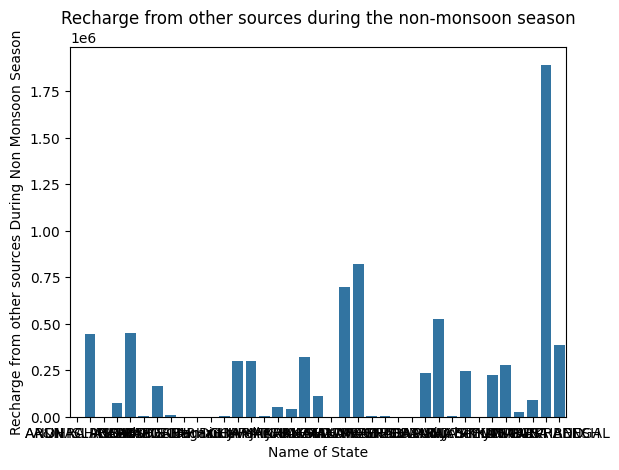

In [ ]:
# Spatial distribution of recharge
plt.figure(figsize=(30,5))
sns.barplot(x='Name of State', y='Recharge from rainfall During Monsoon Season', data=data.groupby('Name of State').sum().reset_index())
plt.title('Recharge from rainfall during the monsoon season')
plt.show()

sns.barplot(x='Name of State', y='Recharge from other sources During Monsoon Season', data=data.groupby('Name of State').sum().reset_index())
plt.title('Recharge from other sources during the monsoon season')
plt.show()

sns.barplot(x='Name of State', y='Recharge from rainfall During Non Monsoon Season', data=data.groupby('Name of State').sum().reset_index())
plt.title('Recharge from rainfall during the non-monsoon season')
plt.show()

sns.barplot(x='Name of State', y='Recharge from other sources During Non Monsoon Season', data=data.groupby('Name of State').sum().reset_index())
plt.title('Recharge from other sources during the non-monsoon season')
plt.show()

In [ ]:
data.columns

Index(['S.no.', 'Name of State', 'Name of District',
       'Recharge from rainfall During Monsoon Season',
       'Recharge from other sources During Monsoon Season',
       'Recharge from rainfall During Non Monsoon Season',
       'Recharge from other sources During Non Monsoon Season',
       'Total Annual Ground Water Recharge', 'Total Natural Discharges',
       'Annual Extractable Ground Water Resource',
       'Current Annual Ground Water Extraction For Irrigation',
       'Current Annual Ground Water Extraction For Domestic & Industrial Use',
       'Total Current Annual Ground Water Extraction',
       'Annual GW Allocation for Domestic Use as on 2025',
       'Net Ground Water Availability for future use',
       'Stage of Ground Water Extraction (%)'],
      dtype='object')

In [ ]:
X = data.drop(['Name of State', 'Name of District', 'Net Ground Water Availability for future use'],axis=1)
y = data['Annual GW Allocation for Domestic Use as on 2025']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

NameError: name 'y_pred' is not defined

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)
r2 = r2_score(y_test, y_pred)
print('R-squared Score:', r2)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)